# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# mount drive to access data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
food_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proj 1 - Food Delivery/foodhub_order.csv')

In [ ]:
food_data_df.head()  # Code to read in the first 5 rows of data in the dataframe.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
food_data_df.shape   # Displays number of rows and columns

(1898, 9)

#### Observations:


There are 1898 rows and 9 columns present in the foodhub csv file. The non-null count is misleading for the 'ratings' column due to the presence of 'Not given' as a value.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
food_data_df.info() # get data types, indices and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The types include: 4 int64, 4 objects, 1 float64.  The 64-bit choice is perplexing considering the data and data size of some of the fields.  For instance, cost of a dinner should never reach the need for 64-bit storage.  If the dataset was larger, changing the data type from int64 to int32 would improve processing power and reduce storage cost for model/model output.

Object type may not be suitable for 'rating' and may need to be addressed.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
print(food_data_df.rating.value_counts(normalize=True)) # Calculate the percentage of distinct values in the 'rating' column and display gap.
preprocessed_df = food_data_df.copy()   #copy full dataframe to new df to handle the rating value of object type and 'Not given'
preprocessed_df['rating'] = pd.to_numeric(preprocessed_df['rating'], errors='coerce') # change rating dtype to numeric for rating column and 'Not given' to nan
preprocessed_df.rating.value_counts(normalize=True)


rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64


,proportion
rating,
5.0,0.506024
4.0,0.332186
3.0,0.161790


#### Observations:


The info function shows there are no nulls or NaNs; however, the rating column shows 39% of ratings are 'Not given', so this is a gap.  My first instinct is to remove the 'Not given' ratings' rows, but value counts does not include the nan values in the percentages.  Will proceed with the rows in place until/unless further analysis is impacted.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
preprocessed_df.duplicated().sum() # check on duplicated rows before getting stats, but 0 was returned
preprocessed_df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:
Once an order is placed, it takes the restaurant an average time of 27.37 minutes to prepare the customer's order.  There is a 15 minute differential between minimum (20 minutes) and maximum (35 minutes) food prep time.  

Additional observation: 'order_id' may need to be a categorical value.  I will address this later if needed.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
print(preprocessed_df['rating'].isna().sum())  # get count of nan values in the ratings column
print(preprocessed_df['rating'].value_counts())   # get count of unique ratings without nan values

736
rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64


#### Observations:
There are 736 columns with nan as a rating after replacing 'Not given'.  May need to address this large set later if further analysis necessitates removal.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

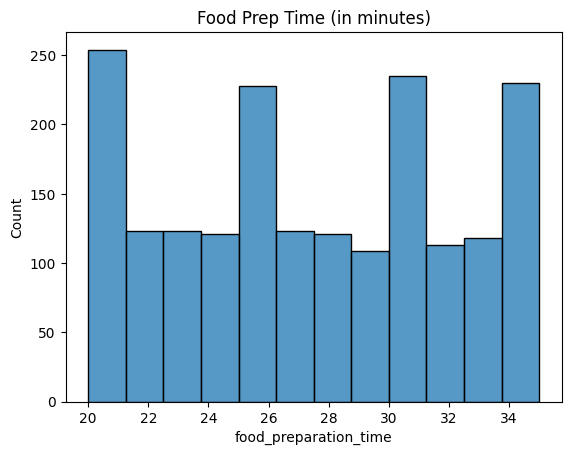

In [ ]:
sns.histplot(data=preprocessed_df, x='food_preparation_time') # food prep time column for analysis
plt.title('Food Prep Time (in minutes)');


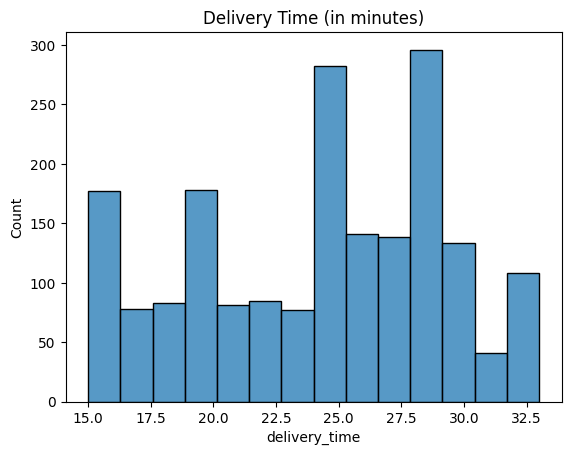

In [ ]:
sns.histplot(data=preprocessed_df, x='delivery_time') # delivery time column with rating hue for analysis
plt.title('Delivery Time (in minutes)');


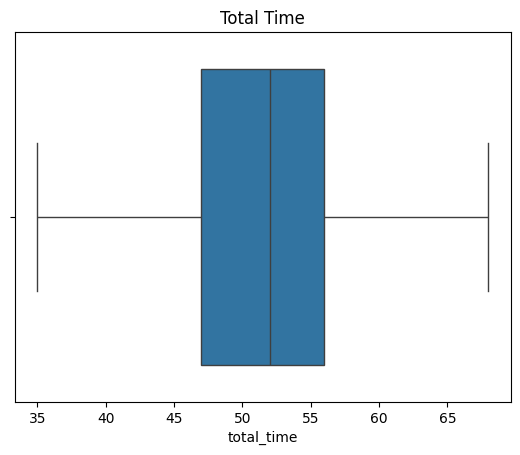

In [ ]:
preprocessed_df['total_time'] = preprocessed_df['food_preparation_time'] + preprocessed_df['delivery_time']
sns.boxplot(data=preprocessed_df, x='total_time') # total time column plotted for analysis
plt.title('Total Time'); # total_time is a derived column by combining food prep time and delivery time

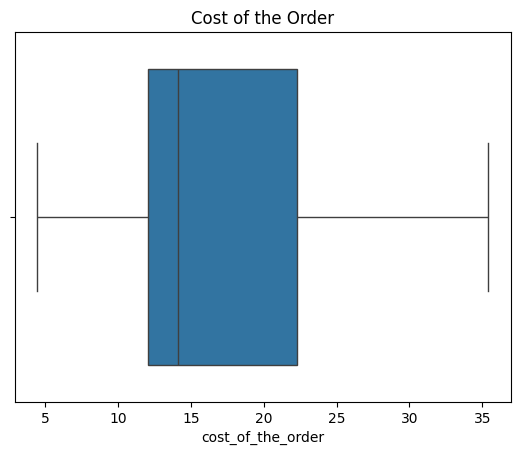

In [ ]:
sns.boxplot(data=preprocessed_df, x='cost_of_the_order') # cost of the order plotted for analysis
plt.title('Cost of the Order');

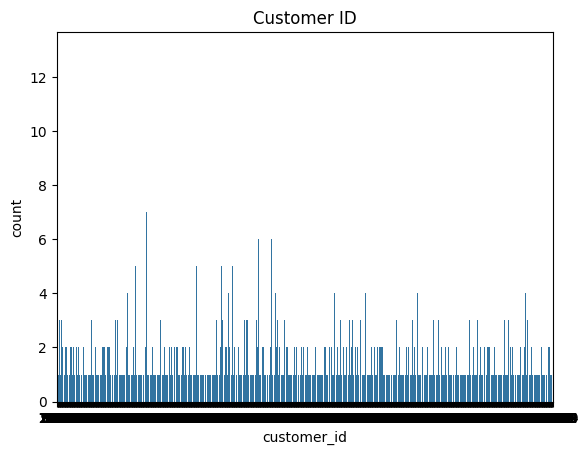

In [ ]:
sns.countplot(data=preprocessed_df, x='customer_id') # customer_id column for analysis
plt.title('Customer ID');

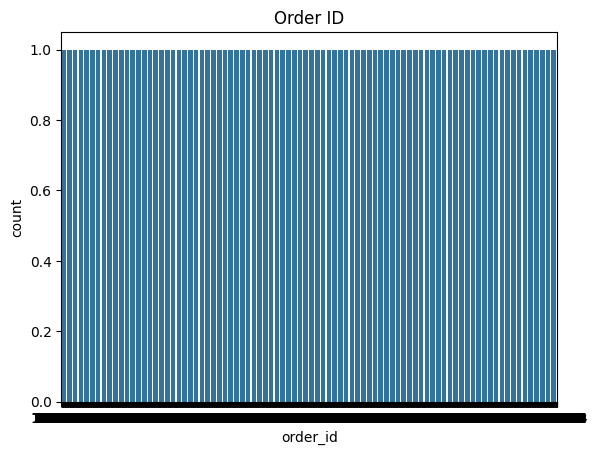

In [ ]:
sns.countplot(data=preprocessed_df, x='order_id') # day of the week plotted for analysis
plt.title('Order ID');

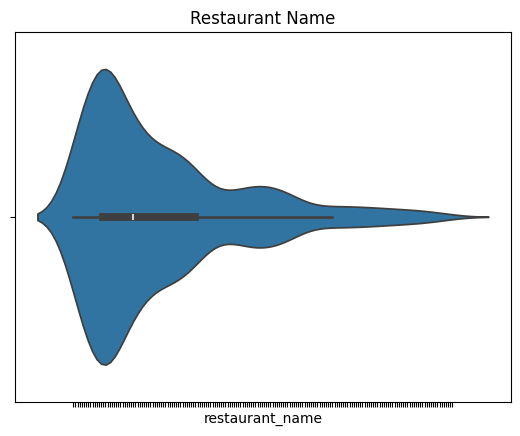

In [ ]:
sns.violinplot(data=preprocessed_df, x='restaurant_name') # restaurant by name plotted for analysis
plt.tick_params(labelbottom = False) # labels for x-axis (restaurant_names) removed to prevent font caching warning due to large amount of names
plt.title('Restaurant Name');

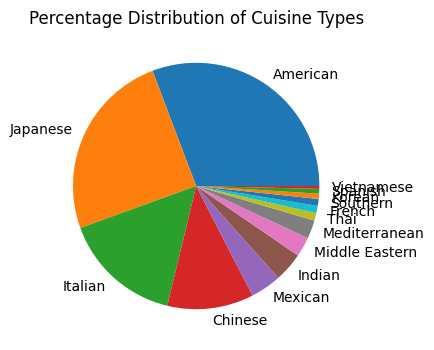

In [ ]:
cuisine_counts = preprocessed_df['cuisine_type'].value_counts() # get the counts of cuisine type for analysis
plt.figure(figsize=(4, 4))
plt.pie(cuisine_counts, labels=cuisine_counts.index)
plt.title('Percentage Distribution of Cuisine Types')
plt.show()



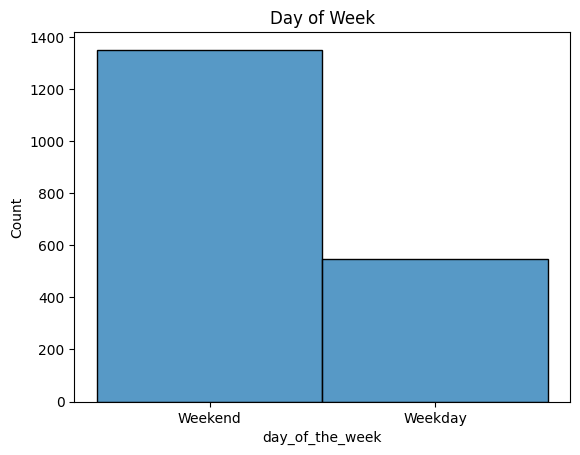

In [ ]:
sns.histplot(data=preprocessed_df, x='day_of_the_week') # Day of the week plotted for analysis
plt.title('Day of Week');

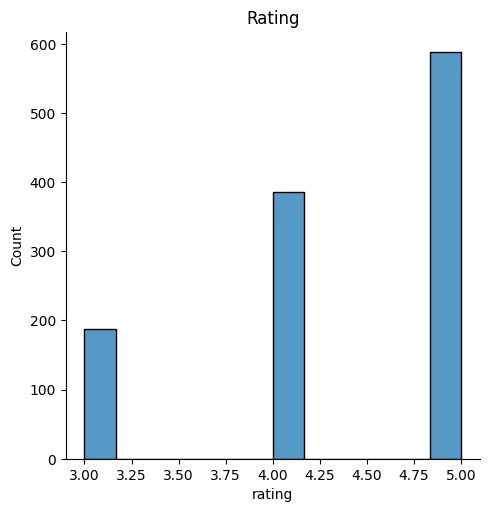

In [ ]:
sns.displot(data=preprocessed_df, x='rating') # 'rating' plotted for analysis
plt.title('Rating');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

             restaurant_name  order_count
0                Shake Shack          219
1          The Meatball Shop          132
2          Blue Ribbon Sushi          119
3  Blue Ribbon Fried Chicken           96
4                       Parm           68


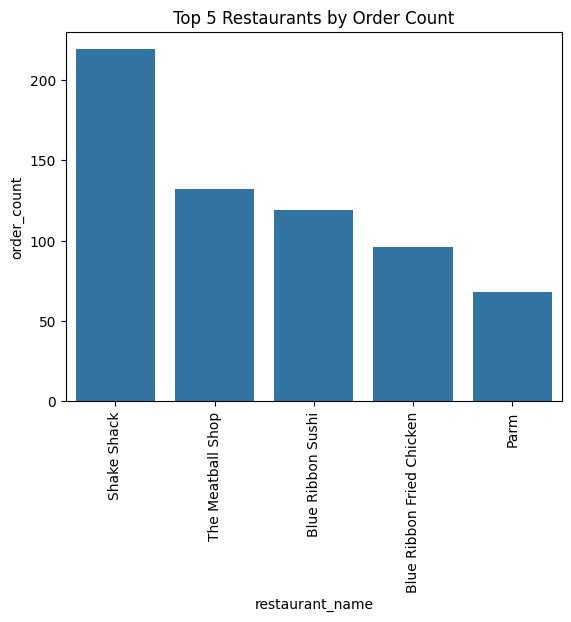

In [ ]:
# Get the count of the orders by restaurant to get top 5 restaurants
restaurant_counts = preprocessed_df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False)
top_restaurants = restaurant_counts.head(5).reset_index()
top_restaurants.columns = ['restaurant_name', 'order_count']
print(top_restaurants)
sns.barplot(data=top_restaurants, x='restaurant_name', y='order_count') # plot the order count of top 5 restaurants
plt.xticks(rotation = 90)
plt.title('Top 5 Restaurants by Order Count');

In [ ]:
# curious about the bottom 5 restaurant counts and if there are any restaurants with 0 orders
bottom_restaurants = restaurant_counts.tail(5).reset_index()
bottom_restaurants.columns = ['restaurant_name', 'order_count']
print(bottom_restaurants)

     restaurant_name  order_count
0     The MasalaWala            1
1         Taro Sushi            1
2           Woorijip            1
3            Wa Jeal            1
4  Wo Hop Restaurant            1


#### Observations:
The Shake Shack had 87 more orders more than The Meatball Shop, which is its nearest rival in order counts.  There is a 151 order count difference between the Shake Shack and Parm, which seems like a large difference between the min and max of the top 5 restaurants.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Capture cuisine_type with highest number of orders for weekends in the dataset
weekend_cuisine_counts = preprocessed_df[preprocessed_df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')['order_id'].count().sort_values(ascending=False)
weekend_cuisine_counts = weekend_cuisine_counts.reset_index()
weekend_cuisine_counts.columns = ['cuisine_type', 'order_count']
print(weekend_cuisine_counts)

      cuisine_type  order_count
0         American          415
1         Japanese          335
2          Italian          207
3          Chinese          163
4          Mexican           53
5           Indian           49
6   Middle Eastern           32
7    Mediterranean           32
8             Thai           15
9           French           13
10          Korean           11
11        Southern           11
12         Spanish           11
13      Vietnamese            4


#### Observations:
American cuisine is the most popular weekend cuisine for the dataset provided by 80 orders.  Approximately 22% of weekend deliveries are from restaurant's selling American food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# count and percentage of orders above 20 dollars
count_above_20 = preprocessed_df[preprocessed_df['cost_of_the_order'] > 20].shape[0]
total_orders = preprocessed_df.shape[0]  # get total number of rows to calculate the percentage
percentage_above_20 = (count_above_20 / total_orders) * 100
print(f"There are {count_above_20} orders that cost more than $20; therefore, the percentage_of orders above $20 is {percentage_above_20:.2f}%.")

There are 555 orders that cost more than $20; therefore, the percentage_of orders above $20 is 29.24%.


#### Observations:
Almost one-third of all orders are over $20, which isn't bad when based on current experience of order costs using other food delivery applications.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Code for min, mean and max for comparison value
delivery_time_mean = preprocessed_df['delivery_time'].mean()
delivery_time_min = preprocessed_df['delivery_time'].min()
delivery_time_max = preprocessed_df['delivery_time'].max()
print(f"The mean delivery time is {delivery_time_mean:.2f} minutes. Maximum delivery time is {delivery_time_max} minutes and minimum is {delivery_time_min} minutes.")

The mean delivery time is 24.16 minutes. Maximum delivery time is 33 minutes and minimum is 15 minutes.


#### Observations:
The mean delivery time is 24.16 minutes.
Note: The minimum time is 15 minutes and maximum time is 33 minutes.  

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Sum by customer_id the number of orders to find the top 3 customers to receive 20% off.
customer_id_counts = preprocessed_df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)
customer_id_counts = customer_id_counts.head().reset_index()
customer_id_counts.columns = ['customer_id', 'order_count']
print(customer_id_counts)

   customer_id  order_count
0        52832           13
1        47440           10
2        83287            9
3       250494            8
4       276192            7


#### Observations:
The top 3 customers to receive 20% off coupons are IDs 52832, 47440 and 83287.  

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


                       order_id  customer_id  cost_of_the_order    rating  \
order_id               1.000000    -0.013960           0.021171  0.006308   
customer_id           -0.013960     1.000000          -0.001322  0.007753   
cost_of_the_order      0.021171    -0.001322           1.000000  0.033983   
rating                 0.006308     0.007753           0.033983  1.000000   
food_preparation_time -0.007026    -0.030330           0.041527 -0.006083   
delivery_time          0.009690    -0.009885          -0.029949 -0.009804   
total_time             0.002288    -0.027754           0.006358 -0.011348   

                       food_preparation_time  delivery_time  total_time  
order_id                           -0.007026       0.009690    0.002288  
customer_id                        -0.030330      -0.009885   -0.027754  
cost_of_the_order                   0.041527      -0.029949    0.006358  
rating                             -0.006083      -0.009804   -0.011348  
food_preparat

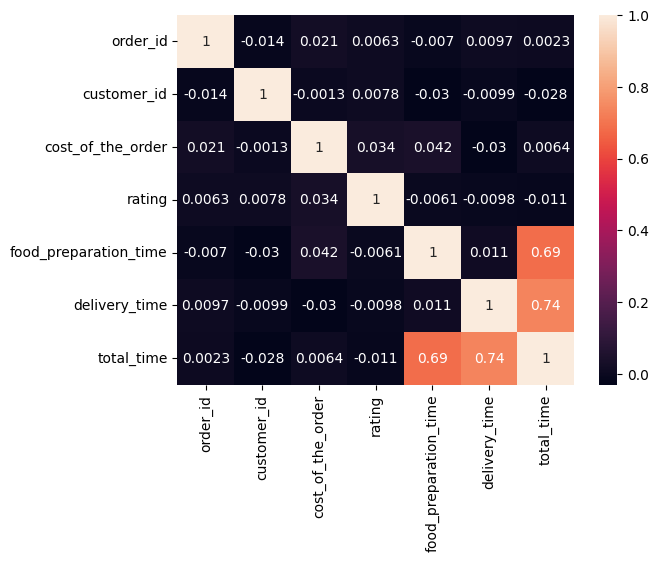

In [ ]:
numeric_df = preprocessed_df.select_dtypes(include=np.number) #create df with numeric values only
print(numeric_df.corr()) #get correlation percentages for numeric variables
sns.heatmap(numeric_df.corr(), annot=True); #create heatmap for numerics only


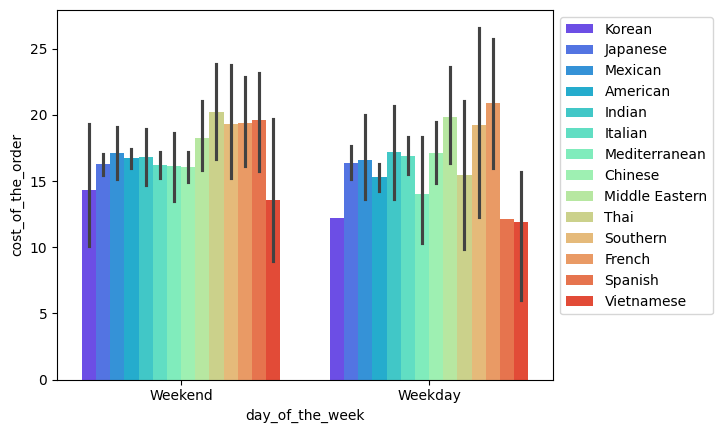

In [ ]:
# barplot of day_of_week against cost_of_the_order with cuisine_type representing a pretty rainbow hue
sns.barplot(data=preprocessed_df, x='day_of_the_week', y='cost_of_the_order', hue='cuisine_type', palette='rainbow')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

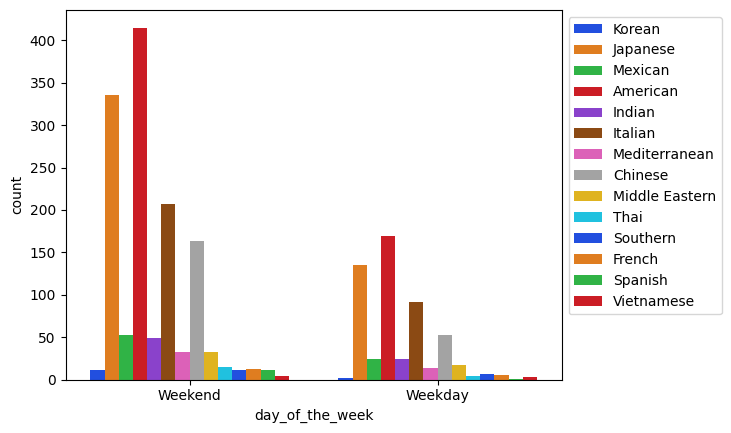

In [ ]:
# create countplot graph showing weekend and weekday, count_of_the_orders and cuisine_type
sns.countplot(data=preprocessed_df, x='day_of_the_week', hue='cuisine_type', palette='bright')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [ ]:
# prepare dataset for barplotting of cuisine counts with min, mean and max order cost
restaurants_cuisine_counts = preprocessed_df.groupby(['cuisine_type']).size().sort_values(ascending=False)
restaurants_cuisine_counts = restaurants_cuisine_counts.reset_index()
restaurants_cuisine_counts.columns = ['cuisine_type', 'count']
restaurants_cuisine_counts['min_order_cost'] = restaurants_cuisine_counts['cuisine_type'].map(preprocessed_df.groupby('cuisine_type')['cost_of_the_order'].min())
restaurants_cuisine_counts['mean_order_cost'] = restaurants_cuisine_counts['cuisine_type'].map(preprocessed_df.groupby('cuisine_type')['cost_of_the_order'].mean())
restaurants_cuisine_counts['max_order_cost'] = restaurants_cuisine_counts['cuisine_type'].map(preprocessed_df.groupby('cuisine_type')['cost_of_the_order'].max())
print(restaurants_cuisine_counts)

      cuisine_type  count  min_order_cost  mean_order_cost  max_order_cost
0         American    584            4.71        16.319829           33.18
1         Japanese    470            4.47        16.304532           33.37
2          Italian    298            5.05        16.418691           33.03
3          Chinese    215            4.75        16.305209           34.19
4          Mexican     77            4.85        16.933117           33.32
5           Indian     73            5.34        16.919726           33.03
6   Middle Eastern     49            5.77        18.820612           32.93
7    Mediterranean     46            5.67        15.474783           35.41
8             Thai     19            6.69        19.207895           32.93
9           French     18           11.98        19.793889           29.25
10        Southern     17            7.38        19.300588           31.43
11          Korean     13            5.77        14.001538           30.75
12         Spanish     12

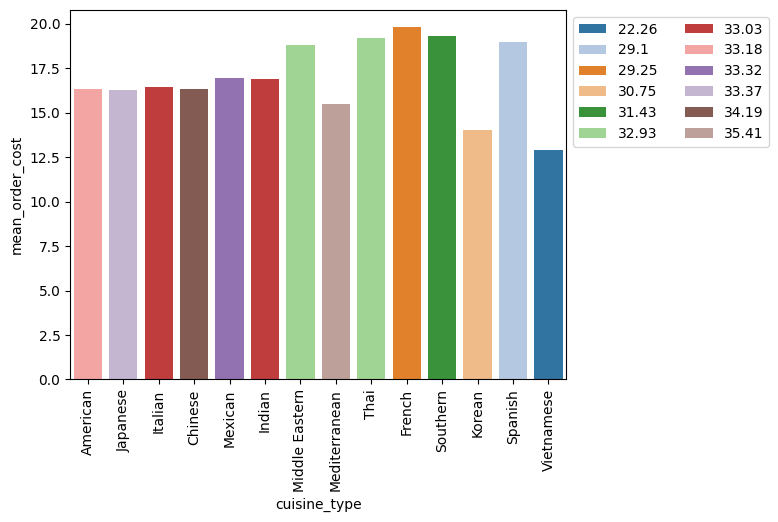

In [ ]:
# plot values from above to see if any relationship exists
sns.barplot(data=restaurants_cuisine_counts, x='cuisine_type', y='mean_order_cost', hue='max_order_cost', palette='tab20')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)
plt.xticks(rotation=90);

<Figure size 800x600 with 0 Axes>

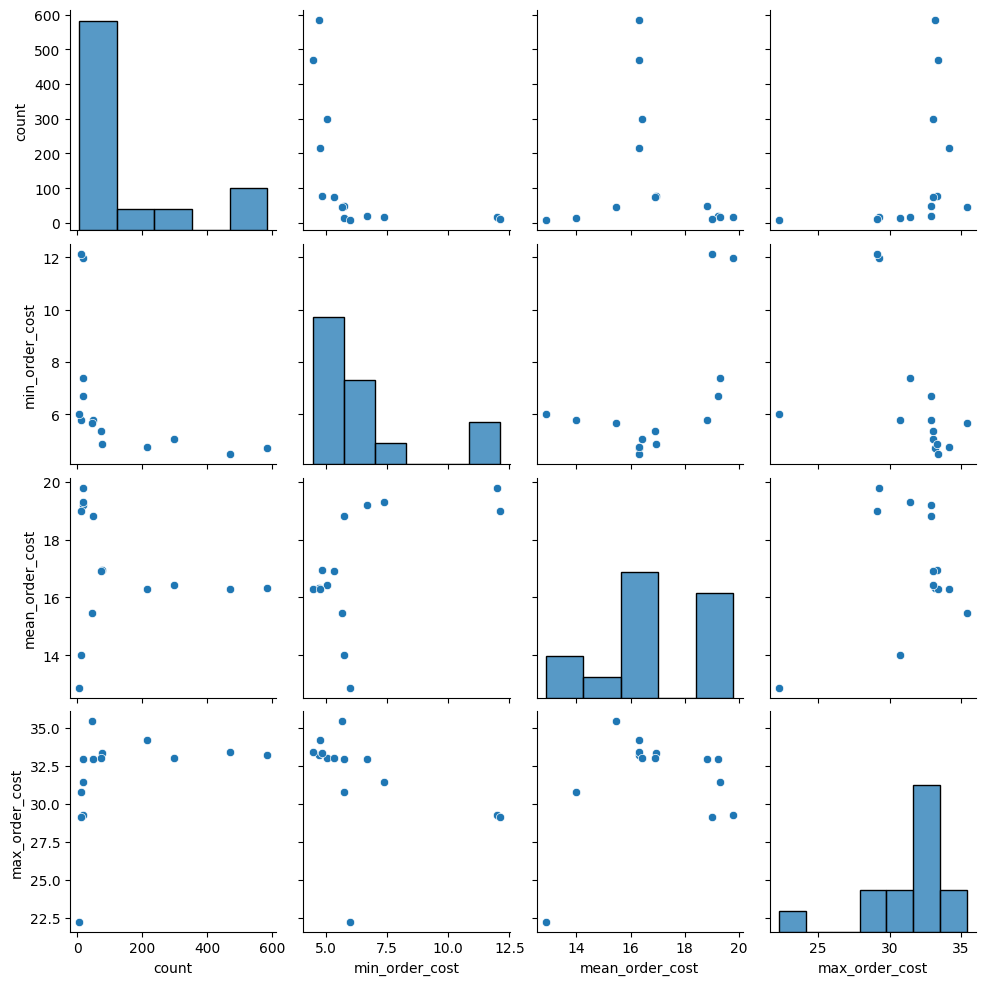

In [ ]:
# create function for creating pairplot visual cuisine_type counts and mean, min, max order costs
def create_cuisine_boxplots(df1, cuisine_type):
  cuisine_types = df1['cuisine_type'].unique()

  # create pairplot
  plt.figure(figsize=(8, 6))
  sns.pairplot(data=restaurants_cuisine_counts);
  plt.show()

create_cuisine_boxplots(restaurants_cuisine_counts, 'cuisine_type')



In [ ]:
# Change nan values to 1 since there are no 1's in the dataset and all nans were in the rating column
cuisine_ratings_df = preprocessed_df.loc[:, ['cuisine_type', 'rating']]
cuisine_ratings_df.fillna(1, inplace=True) # change nan to 1 within the existing dataframe
cuisine_ratings_df['rating_counts'] = cuisine_ratings_df.groupby(['cuisine_type','rating'])['rating'].transform('count') # add column for counts of each 'rating' value per cuisine
cuisine_ratings_df.drop_duplicates(inplace=True)
cuisine_ratings_df.sort_values(by=['cuisine_type','rating'], ascending=False, inplace=True) # sort cuisine_types by rating in rating descending order
cuisine_ratings_df.reset_index(drop=True, inplace=True)
print(cuisine_ratings_df)

      cuisine_type  rating  rating_counts
0       Vietnamese     5.0              2
1       Vietnamese     4.0              1
2       Vietnamese     3.0              2
3       Vietnamese     1.0              2
4             Thai     5.0              6
5             Thai     4.0              3
6             Thai     1.0             10
7          Spanish     5.0              5
8          Spanish     4.0              1
9          Spanish     1.0              6
10        Southern     5.0              5
11        Southern     4.0              7
12        Southern     3.0              1
13        Southern     1.0              4
14  Middle Eastern     5.0             13
15  Middle Eastern     4.0             16
16  Middle Eastern     3.0              5
17  Middle Eastern     1.0             15
18         Mexican     5.0             26
19         Mexican     4.0             16
20         Mexican     3.0              6
21         Mexican     1.0             29
22   Mediterranean     5.0        

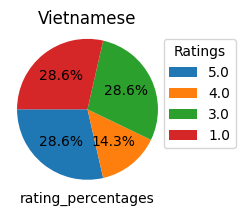

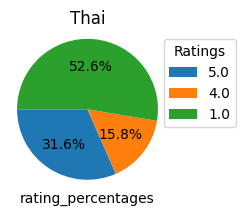

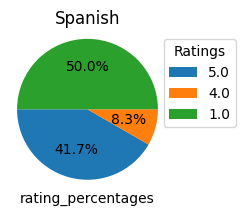

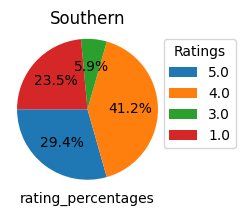

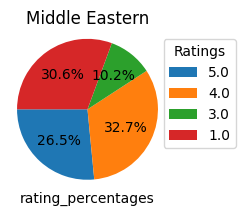

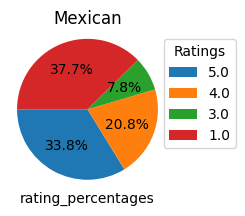

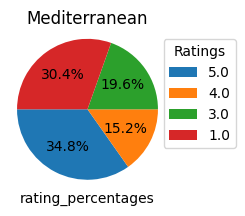

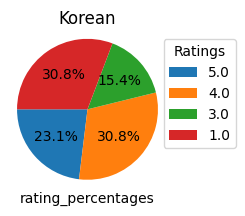

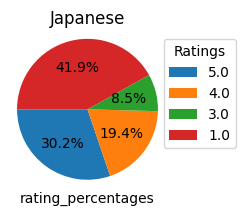

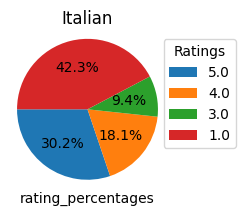

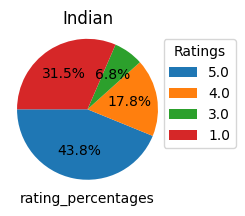

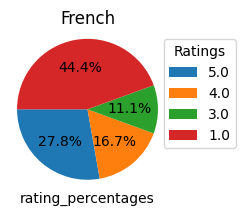

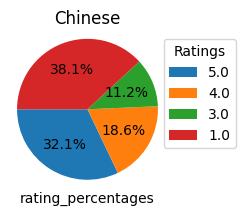

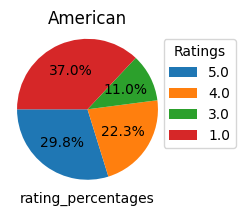

In [ ]:
# Function to plot pie chart for each cuisine_type to visually see the impact of each rating
def cuisine_ratings_pie_charts(df):
    plt.figure(figsize=(2, 2))
    plt.pie(df['rating_counts'], autopct='%1.1f%%', startangle=180) # percentages restrained to 1 decimal point
    plt.xlabel('rating_percentages')
    plt.title(f'{df["cuisine_type"].iloc[0]}') # using cuisine_type for title of each pie chart
    plt.legend(title='Ratings', loc='upper right', labels=df['rating'], bbox_to_anchor=(1.5, 1)) #create legend outside of the pie graph
    plt.axis('equal') # ensure circular shape
    plt.show();

# Create subset dataframe to include cuisine_type, rating, rating_counts for each cuisine type individually prior to calling the cuisine_ratings_pie_chart function
for cuisine in cuisine_ratings_df['cuisine_type'].unique():  # loop through cuisine_ratings_df one category (cuisine_type) at a time
    subset_df = cuisine_ratings_df[cuisine_ratings_df['cuisine_type'] == cuisine]
    cuisine_ratings_pie_charts(subset_df)   # call function to create each cuisine_type pie chart

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Using lambda function to get restaurants with more than 50 ratings and an average rating of greater than 4
promo_restaurants = preprocessed_df.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4)
promo_restaurants_nunique = promo_restaurants['restaurant_name'].nunique()
promo_restaurants_unique = promo_restaurants['restaurant_name'].unique()
total_num_restaurants = preprocessed_df['restaurant_name'].nunique() # Getting total number of restaurants to calculate percentage for clarity.
qualifying_rests = (promo_restaurants_nunique / total_num_restaurants) * 100
print(f'{promo_restaurants_nunique} restaurants qualify for the promotion, which are the {promo_restaurants_unique} restaurants.')
print(f'The percentage of restaurants that qualify for the promotion is {qualifying_rests:.2f}%.')


4 restaurants qualify for the promotion, which are the ['Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'
 'Blue Ribbon Sushi'] restaurants.
The percentage of restaurants that qualify for the promotion is 2.25%.


#### Observations:
There are 4 restaurants qualifying for the promotion, which is a low 2.25% of all orders.  The qualifying restaurants are Blue Ribbon Fried Chicken, The Meatball Show, Shake Shack and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Function to calculate the different percentages on cost_of_the_order to get net revenue amount.
def calculate_revenue(row):
    cost = row['cost_of_the_order']
    if cost > 20:
        return cost * 1.25
    elif cost > 5:
        return cost * 1
# Calling function for each row in the dataframe
for cost_of_the_order in preprocessed_df['cost_of_the_order']:
    order_revenue = preprocessed_df.apply(calculate_revenue, axis=1)
# Summing each row's revenue percent in dollars/cents to get total.
total_revenue = order_revenue.sum()
print(f'The total FoodHub net revenue generated by all orders is ${total_revenue:.2f}.')

The total FoodHub net revenue generated by all orders is $34960.81.


#### Observations:
Net revenue generated from all orders is $34,960.81.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculating the number of orders with a complete time greater than 60 minutes using the column added previously called total_time.  Added percentage for clarity.
orders_more_than_60 = preprocessed_df[preprocessed_df['total_time'] > 60]
count_orders_more_than_60 = orders_more_than_60.shape[0]
total_orders = preprocessed_df.shape[0]
percentage_orders_more_than_60 = (count_orders_more_than_60 / total_orders) * 100
print(f'There are {count_orders_more_than_60} orders that take more than 60 minutes to get delivered.')
print(f'The percentage of orders that take more than 60 minutes is {percentage_orders_more_than_60:.2f}%.')

There are 200 orders that take more than 60 minutes to get delivered.
The percentage of orders that take more than 60 minutes is 10.54%.


#### Observations:
There are 200 orders observing a total preparation/delivery time greater than 60 minutes, which is approximately 10.5% of all orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


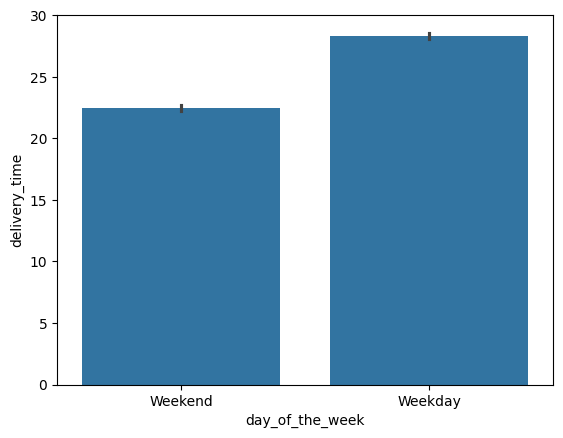

In [ ]:
# Getting mean of delivery time for weekends and weekdays for comparison
day_of_the_week_times = preprocessed_df[['day_of_the_week','delivery_time','total_time']]
day_of_the_week_delivery_mean = day_of_the_week_times.groupby('day_of_the_week')['delivery_time'].mean()
day_of_the_week_delivery_mean.cols = ['day_of_the_week', 'delivery_time_mean']
print(day_of_the_week_delivery_mean)
sns.barplot(data=day_of_the_week_times, x='day_of_the_week', y='delivery_time');

#### Observations:
There is almost a 6 minute differential between the mean for weekday and weekends.  This may be attributed to increased traffic on weekdays.  What the mean doesn't show is that weekend orders have an almost 10 minute differential on delivery minimum times.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are too many missing ratings and only ratings of 5, 4 and 3.  This variable is too highly skewed to get an idea of correlation with other variables (cost, delivery/prep times, weekend/weekday or restaurant/cuisine.
*  American cuisine comes out on top for ratings and number of orders.  With the large number of American options, order counts would be expected to exceed other restaurants.
* There are 10 restaurants with 1 order.  Further analysis needed to find if these restaurants need promotion or are not needed.  
*  Timeframe data would increase observations attained from the order data and delivery times as well as time of day information for order prep time.
*  Weekend orders far exceed weekday counts; however, weekday orders have a higher average delivery time.  Further analysis/data needed to explore hypotheses of causation and possible improvements.
*  There were extremely small correlations between all numerical variables - showing positive and negative relationships.  Customer Id shows negative correlation with almost all of the values but Id is a unique number and should not be used to discern insight.  Order Id falls into this same category.

### Recommendations:

*  Restaurant/customer promotions to get ratings submitted could improve correlation findings.
*  Including location (zip code) of restaurant and customer could give insight into distance of cuisine types.  Conclusions could indicate cuisine types to pursue when adding restaurants to locales where there is interest. More retaurant cuisine variation could improve delivery times as well.
*  Further analysis/data needed to pursue tract on which restaurants are cost-effective for increasing Food Hub net income.
*  Increased number of delivery people is needed on weekends.
*  Weekday promotions/deals could increase order sales.

Standards change proposal for IT/Data Scientists:
*  Institute change to promote data types of lesser size in appropriate situations: amounts/costs should not exceed float32 size expectation and should be typed accordingly to improve data processing times, storage costs and model processing times.

---

In [ ]:
%%shell
jupyter nbconvert --to html //Your notebook path file.ipynb